# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split,GridSearchCV


# Data_preprocessing

'''
Cervical Cancer Risk Factors for Biopsy: This Dataset is Obtained from UCI Repository and kindly acknowledged!

This file contains a List of Risk Factors for Cervical Cancer leading to a Biopsy Examination!

About 11,000 new cases of invasive cervical cancer are diagnosed each year in the U.S. However, the number of new cervical cancer 
cases has been declining steadily over the past decades. Although it is the most preventable type of cancer, each year 
cervical cancer kills about 4,000 women in the U.S. and about 300,000 women worldwide. In the United States, cervical cancer mortality rates plunged by 74% from 1955 - 1992 thanks to increased screening and early detection with the Pap test. AGE Fifty percent of cervical cancer diagnoses occur in women ages 35 - 54, and about 20% occur in women over 65 years of age. The median age of diagnosis is 48 years. About 15% of women develop cervical cancer between the ages of 20 - 30. Cervical cancer is extremely rare in women younger than age 20. However, many young women become infected with multiple types of human papilloma virus, which then can increase their risk of getting cervical cancer in the future. Young women with early abnormal changes who do not have regular examinations are at high risk for localized cancer by the time they are age 40, and for invasive cancer by age 50. SOCIOECONOMIC AND ETHNIC FACTORS Although the rate of cervical cancer has declined among both Caucasian and African-American women over the past decades, it remains much more prevalent in African-Americans -- whose death rates are twice as high as Caucasian women. Hispanic American women have more than twice the risk of invasive cervical cancer as Caucasian women, also due to a lower rate of screening. These differences, however, are almost certainly due to social and economic differences. Numerous studies report that high poverty levels are linked with low screening rates. In addition, lack of health insurance, limited transportation, and language difficulties hinder a poor woman’s access to screening services. HIGH SEXUAL ACTIVITY Human papilloma virus (HPV) is the main risk factor for cervical cancer. In adults, the most important risk factor for HPV is sexual activity with an infected person. Women most at risk for cervical cancer are those with a history of multiple sexual partners, sexual intercourse at age 17 years or younger, or both. A woman who has never been sexually active has a very low risk for developing cervical cancer. Sexual activity with multiple partners increases the likelihood of many other sexually transmitted infections (chlamydia, gonorrhea, syphilis).Studies have found an association between chlamydia and cervical cancer risk, including the possibility that chlamydia may prolong HPV infection. FAMILY HISTORY Women have a higher risk of cervical cancer if they have a first-degree relative (mother, sister) who has had cervical cancer. USE OF ORAL CONTRACEPTIVES Studies have reported a strong association between cervical cancer and long-term use of oral contraception (OC). Women who take birth control pills for more than 5 - 10 years appear to have a much higher risk HPV infection (up to four times higher) than those who do not use OCs. (Women taking OCs for fewer than 5 years do not have a significantly higher risk.) The reasons for this risk from OC use are not entirely clear. Women who use OCs may be less likely to use a diaphragm, condoms, or other methods that offer some protection against sexual transmitted diseases, including HPV. Some research also suggests that the hormones in OCs might help the virus enter the genetic material of cervical cells. HAVING MANY CHILDREN Studies indicate that having many children increases the risk for developing cervical cancer, particularly in women infected with HPV. SMOKING Smoking is associated with a higher risk for precancerous changes (dysplasia) in the cervix and for progression to invasive cervical cancer, especially for women infected with HPV. IMMUNOSUPPRESSION Women with weak immune systems, (such as those with HIV / AIDS), are more susceptible to acquiring HPV. Immunocompromised patients are also at higher risk for having cervical precancer develop rapidly into invasive cancer. DIETHYLSTILBESTROL (DES) From 1938 - 1971, diethylstilbestrol (DES), an estrogen-related drug, was widely prescribed to pregnant women to help prevent miscarriages. The daughters of these women face a higher risk for cervical cancer. DES is no longer prsecribed.
'''

In [2]:
ori_dir='E:/Datasets/'
df=pd.read_csv(ori_dir+'cervicacancerrisk_classification/kag_risk_factors_cervical_cancer.csv')

In [3]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [5]:
df = df.replace('?', np.nan) 

In [6]:
df=df.apply(pd.to_numeric)
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [8]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [10]:
abs(df.corr()['Biopsy']).sort_values()

Number of sexual partners             0.001442
First sexual intercourse              0.007264
Hormonal Contraceptives               0.007750
STDs:Hepatitis B                      0.010034
STDs:molluscum contagiosum            0.010034
STDs:pelvic inflammatory disease      0.010034
STDs:HPV                              0.014200
STDs:vaginal condylomatosis           0.020108
Smokes (packs/year)                   0.024882
Smokes                                0.029356
IUD (years)                           0.033275
STDs:syphilis                         0.043061
Num of pregnancies                    0.046416
STDs: Time since last diagnosis       0.047585
IUD                                   0.053194
Age                                   0.055956
Smokes (years)                        0.062044
STDs: Time since first diagnosis      0.070153
Hormonal Contraceptives (years)       0.079388
STDs:condylomatosis                   0.086390
STDs:vulvo-perineal condylomatosis    0.088902
STDs: Number 

In [11]:
(df['STDs:AIDS'].value_counts()+105)==len(df)

0.0    True
Name: STDs:AIDS, dtype: bool

In [12]:
df['STDs: Time since first diagnosis'].value_counts().sum()+787

858

In [13]:
df.drop(['STDs:AIDS','STDs:cervical condylomatosis'],axis=1,inplace=True)

In [14]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [15]:
df['Number of sexual partners'].value_counts()

2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
6.0       9
7.0       7
8.0       4
15.0      1
10.0      1
9.0       1
28.0      1
Name: Number of sexual partners, dtype: int64

In [16]:
df['Hormonal Contraceptives'].value_counts()

1.0    481
0.0    269
Name: Hormonal Contraceptives, dtype: int64

In [17]:
df['Smokes (packs/year)'].value_counts()

0.000000     722
0.513202      18
1.000000       6
3.000000       5
0.750000       4
            ... 
15.000000      1
0.900000       1
0.370000       1
0.025000       1
2.100000       1
Name: Smokes (packs/year), Length: 62, dtype: int64

In [18]:
df['Smokes (years)'].value_counts()

0.000000     722
1.266973      15
9.000000       9
5.000000       9
1.000000       8
3.000000       7
2.000000       7
8.000000       6
16.000000      6
7.000000       6
11.000000      5
4.000000       5
10.000000      5
6.000000       4
14.000000      4
15.000000      4
0.500000       3
13.000000      3
19.000000      3
12.000000      3
22.000000      2
28.000000      1
18.000000      1
32.000000      1
20.000000      1
21.000000      1
34.000000      1
37.000000      1
0.160000       1
24.000000      1
Name: Smokes (years), dtype: int64

In [19]:
df.drop(['Number of sexual partners','First sexual intercourse'],axis=1,inplace=True)

In [20]:
df.isna().sum()

Age                                     0
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis      787
STDs: Time since last diagnosis   

In [21]:
df.Smokes.value_counts()

0.0    722
1.0    123
Name: Smokes, dtype: int64

In [22]:
df.loc[df['Smokes'].isna()]

,Age,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
46,36,3.0,NaN,NaN,NaN,1.0,5.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
117,30,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
186,25,2.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,...,6.0,6.0,0,0,0,0,0,0,0,0
279,22,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
297,21,2.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
451,16,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
552,18,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
564,26,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
648,18,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,...,19.0,1.0,0,0,0,0,0,0,0,0
669,38,2.0,NaN,NaN,NaN,1.0,3.0,1.0,6.0,0.0,...,NaN,NaN,1,0,1,1,0,1,0,0


In [23]:
df['Smokes'].fillna(0.0,inplace=True)
df['Smokes (packs/year)'].fillna(0.0,inplace=True)
df['Smokes (years)'].fillna(0.0,inplace=True)

In [24]:
df['Num of pregnancies'].value_counts()

1.0     270
2.0     240
3.0     139
4.0      74
5.0      35
6.0      18
0.0      16
7.0       6
8.0       2
10.0      1
11.0      1
Name: Num of pregnancies, dtype: int64

In [25]:
df.loc[df['Num of pregnancies'].isna()]

,Age,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
9,44,NaN,1.0,1.266973,2.80,0.0,0.00,NaN,NaN,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
18,42,NaN,0.0,0.000000,0.00,1.0,7.00,1.0,6.00,1.0,...,NaN,NaN,0,0,0,0,0,0,0,0
19,40,NaN,0.0,0.000000,0.00,0.0,0.00,1.0,1.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
41,37,NaN,0.0,0.000000,0.00,0.0,0.00,NaN,NaN,1.0,...,15.0,15.0,0,1,0,1,0,1,0,1
96,35,NaN,1.0,15.000000,15.00,1.0,14.00,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,1,1,1,1
123,29,NaN,0.0,0.000000,0.00,1.0,2.00,NaN,NaN,1.0,...,1.0,1.0,0,0,0,0,0,0,0,0
167,27,NaN,0.0,0.000000,0.00,0.0,0.00,1.0,2.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
185,28,NaN,0.0,0.000000,0.00,1.0,9.00,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,1,1,0,1
197,26,NaN,0.0,0.000000,0.00,1.0,1.00,NaN,NaN,0.0,...,NaN,NaN,0,1,0,1,0,0,0,0
265,21,NaN,0.0,0.000000,0.00,0.0,0.00,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [26]:
df.loc[df['Num of pregnancies']==3.0].mean()

Age                                   29.467626
Num of pregnancies                     3.000000
Smokes                                 0.158273
Smokes (years)                         1.500244
Smokes (packs/year)                    0.452253
Hormonal Contraceptives                0.811475
Hormonal Contraceptives (years)        3.356311
IUD                                    0.181818
IUD (years)                            0.872562
STDs                                   0.088710
STDs (number)                          0.104839
STDs:condylomatosis                    0.016129
STDs:vaginal condylomatosis            0.000000
STDs:vulvo-perineal condylomatosis     0.016129
STDs:syphilis                          0.032258
STDs:pelvic inflammatory disease       0.000000
STDs:genital herpes                    0.000000
STDs:molluscum contagiosum             0.000000
STDs:HIV                               0.040323
STDs:Hepatitis B                       0.000000
STDs:HPV                               0

In [27]:
df.loc[df['Num of pregnancies']==2.0].mean()

Age                                   25.995833
Num of pregnancies                     2.000000
Smokes                                 0.108333
Smokes (years)                         0.852366
Smokes (packs/year)                    0.263872
Hormonal Contraceptives                0.682464
Hormonal Contraceptives (years)        2.520474
IUD                                    0.118483
IUD (years)                            0.579336
STDs                                   0.119048
STDs (number)                          0.242857
STDs:condylomatosis                    0.095238
STDs:vaginal condylomatosis            0.009524
STDs:vulvo-perineal condylomatosis     0.090476
STDs:syphilis                          0.019048
STDs:pelvic inflammatory disease       0.000000
STDs:genital herpes                    0.000000
STDs:molluscum contagiosum             0.000000
STDs:HIV                               0.023810
STDs:Hepatitis B                       0.000000
STDs:HPV                               0

In [28]:
df.loc[df['Num of pregnancies']==1.0].mean()

Age                                   22.003704
Num of pregnancies                     1.000000
Smokes                                 0.144444
Smokes (years)                         0.764077
Smokes (packs/year)                    0.291279
Hormonal Contraceptives                0.506726
Hormonal Contraceptives (years)        0.981490
IUD                                    0.013453
IUD (years)                            0.068027
STDs                                   0.088106
STDs (number)                          0.158590
STDs:condylomatosis                    0.057269
STDs:vaginal condylomatosis            0.004405
STDs:vulvo-perineal condylomatosis     0.057269
STDs:syphilis                          0.008811
STDs:pelvic inflammatory disease       0.000000
STDs:genital herpes                    0.004405
STDs:molluscum contagiosum             0.000000
STDs:HIV                               0.017621
STDs:Hepatitis B                       0.004405
STDs:HPV                               0

In [29]:
df.corr()['Num of pregnancies']

Age                                   0.548856
Num of pregnancies                    1.000000
Smokes                                0.085375
Smokes (years)                        0.180708
Smokes (packs/year)                   0.101290
Hormonal Contraceptives               0.156730
Hormonal Contraceptives (years)       0.224790
IUD                                   0.219104
IUD (years)                           0.154987
STDs                                  0.047554
STDs (number)                         0.001744
STDs:condylomatosis                  -0.041242
STDs:vaginal condylomatosis          -0.003456
STDs:vulvo-perineal condylomatosis   -0.040401
STDs:syphilis                         0.148510
STDs:pelvic inflammatory disease     -0.059383
STDs:genital herpes                  -0.033757
STDs:molluscum contagiosum            0.043122
STDs:HIV                              0.010098
STDs:Hepatitis B                     -0.033757
STDs:HPV                             -0.029640
STDs: Number 

In [30]:
df.loc[df['Num of pregnancies'].isna()].sort_values('Age')

,Age,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
819,14,NaN,0.0,0.000000,0.00,NaN,NaN,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
812,14,NaN,0.0,0.000000,0.00,1.0,0.08,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
690,15,NaN,0.0,0.000000,0.00,1.0,0.08,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
814,16,NaN,0.0,0.000000,0.00,1.0,0.42,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,1
745,16,NaN,0.0,0.000000,0.00,0.0,0.00,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
811,17,NaN,0.0,0.000000,0.00,1.0,0.25,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
744,17,NaN,1.0,4.000000,1.00,0.0,0.00,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
703,17,NaN,0.0,0.000000,0.00,1.0,2.00,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
544,17,NaN,0.0,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
692,18,NaN,0.0,0.000000,0.00,1.0,0.42,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [31]:
df.loc[[819,812,690,814,745,811,744,703,544,692,697,699,693,706,696,810,813,365,265,653,816,707],'Num of pregnancies']='1.0'
df.loc[[708,272,820,689,197,691,421,650,702,167,698,185,694,700,695,701,545,817,808,809,123,815],'Num of pregnancies']='2.0'
df.loc[[818,96,807,41,19,704,651,18,652,654,9,705],'Num of pregnancies']='3.0'

In [32]:
df.isna().sum()

Age                                     0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis      787
STDs: Time since last diagnosis   

In [33]:
df['IUD (years)'].value_counts()

0.00     658
3.00      11
2.00      10
5.00       9
1.00       8
7.00       7
8.00       7
6.00       5
4.00       5
11.00      3
0.50       2
0.08       2
0.33       1
15.00      1
10.00      1
0.41       1
17.00      1
0.25       1
0.91       1
1.50       1
0.17       1
19.00      1
0.16       1
12.00      1
0.58       1
9.00       1
Name: IUD (years), dtype: int64

In [34]:
df['IUD'].fillna(df['IUD'].mode()[0],inplace=True)
df['IUD (years)'].fillna(df['IUD (years)'].mode()[0],inplace=True)

In [35]:
df['Hormonal Contraceptives'].value_counts()

1.0    481
0.0    269
Name: Hormonal Contraceptives, dtype: int64

In [36]:
0.358667*len(df)

307.736286

In [37]:
abs(df.corr()['Hormonal Contraceptives (years)']).sort_values()

STDs                                  0.000640
IUD (years)                           0.001451
Dx:CIN                                0.003273
STDs:syphilis                         0.004113
STDs (number)                         0.007055
STDs:condylomatosis                   0.008177
STDs:vulvo-perineal condylomatosis    0.010241
Dx                                    0.013446
STDs:pelvic inflammatory disease      0.014807
STDs:genital herpes                   0.019871
STDs:Hepatitis B                      0.022403
STDs:molluscum contagiosum            0.022403
STDs: Number of diagnosis             0.038459
Hinselmann                            0.038945
STDs:HIV                              0.039375
STDs:vaginal condylomatosis           0.039823
Smokes (packs/year)                   0.041711
Smokes                                0.048494
Smokes (years)                        0.051619
STDs:HPV                              0.054292
Dx:Cancer                             0.054712
Dx:HPV       

In [38]:
df.loc[df['Hormonal Contraceptives'].isna()].sort_values('Age')[:30]['Hormonal Contraceptives'].fillna(0.0,inplace=True)
df.loc[df['Hormonal Contraceptives (years)'].isna()].sort_values('Age')[:30]['Hormonal Contraceptives (years)'].fillna(0.0,inplace=True)

In [39]:
df_hor_nan_30=df.loc[df['Hormonal Contraceptives'].isna()].sort_values('Age')[:29]
for i in df_hor_nan_30.index:
    df['Hormonal Contraceptives'].iloc[i]=0.0

C:\Users\Yangki\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [40]:
df_hor_nan=df.loc[df['Hormonal Contraceptives'].isna()]
for i in df_hor_nan.index:
    df['Hormonal Contraceptives'].iloc[i]=1.0

In [41]:
df_hor_yrs_nan_30=df.loc[df['Hormonal Contraceptives (years)'].isna()].sort_values('Age')[:29]
for i in df_hor_yrs_nan_30.index:
    df['Hormonal Contraceptives (years)'].iloc[i]=0.0

In [42]:
df_hor_yrs_nan=(df.loc[df['Hormonal Contraceptives (years)'].isna()]).sort_values('Age')
df_hor_yrs_nan

,Age,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
762,19,1.0,0.0,0.0,0.000000,1.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
696,19,1.0,1.0,1.0,0.040000,1.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
586,19,1.0,1.0,7.0,0.513202,1.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
542,19,1.0,0.0,0.0,0.000000,1.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
489,19,2.0,0.0,0.0,0.000000,1.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,35,2.0,1.0,15.0,0.320000,1.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
90,36,6.0,0.0,0.0,0.000000,1.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
476,38,2.0,0.0,0.0,0.000000,1.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
751,41,3.0,0.0,0.0,0.000000,1.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


In [43]:
for i in df_hor_yrs_nan.index[:14]:
    df['Hormonal Contraceptives (years)'].iloc[i]=0.25
for i in df_hor_yrs_nan.index[14:16]:
    df['Hormonal Contraceptives (years)'].iloc[i]=0.5
for i in df_hor_yrs_nan.index[16:43]:
    df['Hormonal Contraceptives (years)'].iloc[i]=1.0
for i in df_hor_yrs_nan.index[43:57]:
    df['Hormonal Contraceptives (years)'].iloc[i]=2.0
for i in df_hor_yrs_nan.index[57:71]:
    df['Hormonal Contraceptives (years)'].iloc[i]=3.0
for i in df_hor_yrs_nan.index[71:79]:
    df['Hormonal Contraceptives (years)'].iloc[i]=5.0

C:\Users\Yangki\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [44]:
df.isna().sum()

Age                                     0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)         0
IUD                                     0
IUD (years)                             0
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis      787
STDs: Time since last diagnosis   

In [45]:
pd.to_numeric(df['Num of pregnancies'],)

0      1.0
1      1.0
2      1.0
3      4.0
4      4.0
      ... 
853    0.0
854    1.0
855    0.0
856    2.0
857    1.0
Name: Num of pregnancies, Length: 858, dtype: float64

In [46]:
df=df.astype({'Num of pregnancies':'float'})

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Num of pregnancies                  858 non-null    float64
 2   Smokes                              858 non-null    float64
 3   Smokes (years)                      858 non-null    float64
 4   Smokes (packs/year)                 858 non-null    float64
 5   Hormonal Contraceptives             858 non-null    float64
 6   Hormonal Contraceptives (years)     858 non-null    float64
 7   IUD                                 858 non-null    float64
 8   IUD (years)                         858 non-null    float64
 9   STDs                                753 non-null    float64
 10  STDs (number)                       753 non-null    float64
 11  STDs:condylomatosis                 753 non-n

In [48]:
abs(df.corr()['Biopsy']).sort_values()

Hormonal Contraceptives               0.001025
STDs:Hepatitis B                      0.010034
STDs:molluscum contagiosum            0.010034
STDs:pelvic inflammatory disease      0.010034
STDs:HPV                              0.014200
STDs:vaginal condylomatosis           0.020108
Smokes (packs/year)                   0.024487
Smokes                                0.028724
IUD (years)                           0.038176
Num of pregnancies                    0.038550
STDs:syphilis                         0.043061
STDs: Time since last diagnosis       0.047585
Age                                   0.055956
IUD                                   0.059231
Smokes (years)                        0.061204
STDs: Time since first diagnosis      0.070153
STDs:condylomatosis                   0.086390
Hormonal Contraceptives (years)       0.086604
STDs:vulvo-perineal condylomatosis    0.088902
STDs: Number of diagnosis             0.097449
STDs (number)                         0.098347
STDs         

In [49]:
df['STDs: Time since first diagnosis'].fillna(0.0,inplace=True)
df['STDs: Time since last diagnosis'].fillna(0.0,inplace=True)

In [50]:
df.loc[df['STDs:HPV'].isna()]

,Age,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
71,34,3.0,0.0,0.0,0.00,1.0,5.00,0.0,0.0,NaN,...,0.0,0.0,0,0,0,0,0,0,0,0
74,35,2.0,1.0,15.0,0.32,1.0,5.00,0.0,0.0,NaN,...,0.0,0.0,0,0,0,0,0,0,0,0
90,36,6.0,0.0,0.0,0.00,1.0,5.00,0.0,0.0,NaN,...,0.0,0.0,0,0,0,0,0,0,0,0
95,31,2.0,0.0,0.0,0.00,1.0,3.00,0.0,0.0,NaN,...,0.0,0.0,0,0,0,0,0,0,0,0
98,31,5.0,0.0,0.0,0.00,1.0,3.00,0.0,0.0,NaN,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,23,1.0,1.0,5.0,0.75,1.0,1.00,0.0,0.0,NaN,...,0.0,0.0,0,0,0,0,0,0,0,0
794,20,1.0,0.0,0.0,0.00,1.0,0.25,0.0,0.0,NaN,...,0.0,0.0,0,0,0,0,0,0,0,0
807,36,3.0,1.0,19.0,7.60,1.0,8.00,0.0,0.0,NaN,...,0.0,0.0,0,0,0,0,0,0,0,0
814,16,1.0,0.0,0.0,0.00,1.0,0.42,0.0,0.0,NaN,...,0.0,0.0,0,0,0,0,0,0,0,1


In [51]:
df.isnull().sum()

Age                                     0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)         0
IUD                                     0
IUD (years)                             0
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis        0
STDs: Time since last diagnosis   

In [52]:
df['STDs'].value_counts()

0.0    674
1.0     79
Name: STDs, dtype: int64

In [53]:
df['STDs (number)'].value_counts()

0.0    674
2.0     37
1.0     34
3.0      7
4.0      1
Name: STDs (number), dtype: int64

In [54]:
df['STDs:HIV'].value_counts()

0.0    735
1.0     18
Name: STDs:HIV, dtype: int64

In [55]:
df['STDs:HPV'].value_counts()

0.0    751
1.0      2
Name: STDs:HPV, dtype: int64

In [56]:
df[df.columns[11:21]].sum().sum()

133.0

In [57]:
df['STDs (number)'].sum().sum()

133.0

In [58]:
df['STDs'].sum()

79.0

In [59]:
df.loc[df['STDs: Number of diagnosis']==0.0].isnull().sum()

Age                                     0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)         0
IUD                                     0
IUD (years)                             0
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis        0
STDs: Time since last diagnosis   

In [60]:
for i in df.columns:
    df[i].fillna(0.0,inplace=True)

In [61]:
df.isnull().sum()

Age                                   0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
STDs: Time since first diagnosis      0
STDs: Time since last diagnosis       0
Dx:Cancer                             0


In [62]:
df_corr=df.corr()['Biopsy']

In [63]:
abs(df_corr).sort_values()

Hormonal Contraceptives               0.001025
STDs:pelvic inflammatory disease      0.008940
STDs:Hepatitis B                      0.008940
STDs:molluscum contagiosum            0.008940
STDs:HPV                              0.012650
STDs:vaginal condylomatosis           0.017911
Smokes (packs/year)                   0.024487
Smokes                                0.028724
IUD (years)                           0.038176
STDs:syphilis                         0.038311
Num of pregnancies                    0.038550
Age                                   0.055956
STDs: Time since first diagnosis      0.057914
IUD                                   0.059231
Smokes (years)                        0.061204
STDs: Time since last diagnosis       0.063269
Hormonal Contraceptives (years)       0.086604
STDs:condylomatosis                   0.090164
STDs:vulvo-perineal condylomatosis    0.092548
STDs: Number of diagnosis             0.097449
STDs (number)                         0.103153
Dx:CIN       

In [64]:
df.drop(['Hormonal Contraceptives'],axis=1,inplace=True)

In [65]:
y=df['Biopsy']
X=df.drop(['Biopsy'],axis=1)

In [66]:
y

0      0
1      0
2      0
3      0
4      0
      ..
853    0
854    0
855    0
856    0
857    0
Name: Biopsy, Length: 858, dtype: int64

In [67]:
X

,Age,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0,0,0,0,0,0
1,15,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0,0,0,0,0,0
2,34,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0,0,0,0,0,0
3,52,4.0,1.0,37.0,37.0,3.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,1,0,1,0,0,0,0
4,46,4.0,0.0,0.0,0.0,15.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0,0,0,0,0,0
854,32,1.0,0.0,0.0,0.0,8.00,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0,0,0,0,0,0
855,25,0.0,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0,0,0,0,0,1
856,33,2.0,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0,0,0,0,0,0


In [68]:
X_train, X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=0)

In [69]:
class_weight = {0: .07, 1: 1.}

# Linear model

In [70]:
df['Biopsy'].value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

C:\Users\Yangki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Biopsy', ylabel='count'>

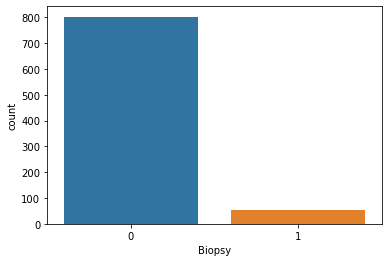

In [71]:
import seaborn as sns
sns.countplot(df['Biopsy'])

In [72]:
from sklearn.linear_model import LogisticRegression

log=LogisticRegression()

In [73]:
log.fit(X_train,y_train)

C:\Users\Yangki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
log.score(X_val,y_val)

0.9534883720930233

In [75]:
log.score(X_train,y_train)

0.9664723032069971

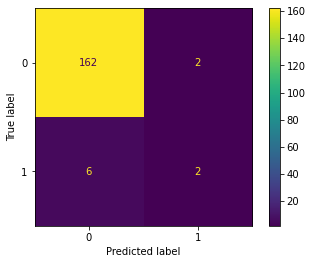

In [76]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log,X_val,y_val)

# SVC

In [77]:
from sklearn.svm import SVC

In [78]:
param_grid = {'C': [ 1000,10000], 
              'gamma': [ 0.0001,0.00001],
              'kernel': ['rbf','poly']} 
grid=GridSearchCV(SVC(),param_grid)

In [79]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1000, 10000], 'gamma': [0.0001, 1e-05],
                         'kernel': ['rbf', 'poly']})

In [80]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [81]:
svc=SVC(**grid.best_params_)

In [83]:
svc.fit(X_train,y_train)

SVC(C=1000, gamma=0.0001)

In [85]:
svc.score(X_train,y_train)

0.9664723032069971

In [86]:
svc.score(X_val,y_val)

0.9709302325581395

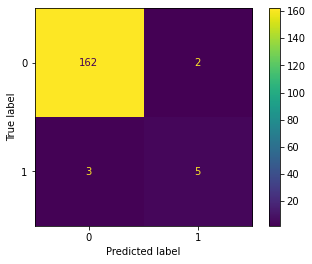

In [87]:
plot_confusion_matrix(svc,X_val,y_val)

# Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

In [92]:
param_grid = { 
    'n_estimators': [50,100,200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [93]:
grid_rf=GridSearchCV(rf,param_grid)
grid_rf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 500]})

In [94]:
grid_rf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 100}

In [95]:
rf=RandomForestClassifier(**grid_rf.best_params_)

In [96]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [97]:
rf.score(X_train,y_train)

0.9752186588921283

In [98]:
rf.score(X_val,y_val)

0.9593023255813954

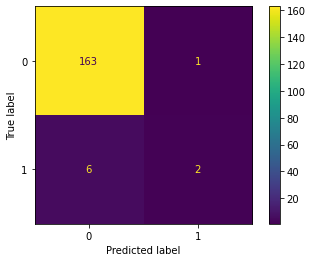

In [99]:
plot_confusion_matrix(rf,X_val,y_val)

# GradientBoostingClassifier

In [143]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()

In [144]:
GBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [145]:
GBC.score(X_train,y_train)

0.9927113702623906

In [146]:
GBC.score(X_val,y_val)

0.9709302325581395

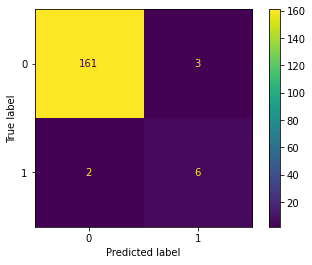

In [147]:
plot_confusion_matrix(GBC,X_val,y_val)

# Voting classifier

In [148]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

eclf = VotingClassifier(
    estimators=[('svc', svc), ('rf', rf), ('GBC', GBC)],
    voting='hard')

for clf_num, label in zip([svc, rf, GBC ], ['Support Vector Machine', 'Random Forest', 'GBC']):
    scores = cross_val_score(clf_num, X_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.96 (+/- 0.01) [Support Vector Machine]
Accuracy: 0.95 (+/- 0.01) [Random Forest]
Accuracy: 0.95 (+/- 0.01) [GBC]


In [149]:
eclf.fit(X_train, y_train)

VotingClassifier(estimators=[('svc', SVC(C=1000, gamma=0.0001)),
                             ('rf', RandomForestClassifier(max_depth=5)),
                             ('GBC', GradientBoostingClassifier())])

In [150]:
eclf.score(X_train,y_train)

0.9810495626822158

In [152]:
eclf.score(X_val,y_val)

0.9767441860465116

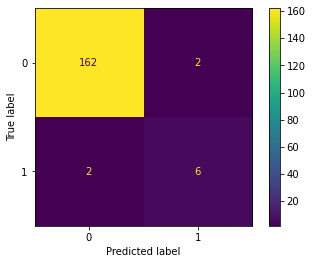

In [153]:
plot_confusion_matrix(eclf
                      ,X_val,y_val)

# Deep learning

In [100]:
import tensorflow as tf

In [108]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [109]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [110]:
history=model.fit(X_train,y_train,epochs=80,validation_data=(X_val,y_val))

Epoch 1/80
22/22 [==============================] - 1s 10ms/step - loss: 1.4311 - accuracy: 0.5102 - val_loss: 0.2168 - val_accuracy: 0.9535
Epoch 2/80
22/22 [==============================] - 0s 4ms/step - loss: 0.3808 - accuracy: 0.9315 - val_loss: 0.2134 - val_accuracy: 0.9535
Epoch 3/80
22/22 [==============================] - 0s 4ms/step - loss: 0.3271 - accuracy: 0.9315 - val_loss: 0.2068 - val_accuracy: 0.9535
Epoch 4/80
22/22 [==============================] - 0s 4ms/step - loss: 0.2795 - accuracy: 0.9315 - val_loss: 0.2041 - val_accuracy: 0.9535
Epoch 5/80
22/22 [==============================] - 0s 5ms/step - loss: 0.2610 - accuracy: 0.9315 - val_loss: 0.1911 - val_accuracy: 0.9535
Epoch 6/80
22/22 [==============================] - 0s 4ms/step - loss: 0.2391 - accuracy: 0.9315 - val_loss: 0.1800 - val_accuracy: 0.9535
Epoch 7/80
22/22 [==============================] - 0s 5ms/step - loss: 0.2237 - accuracy: 0.9315 - val_loss: 0.1741 - val_accuracy: 0.9535
Epoch 8/80
22/22 [=

Text(0.5, 1.0, 'Training and validation loss')

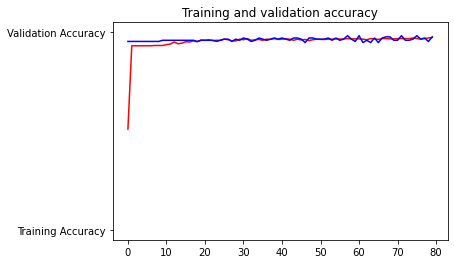

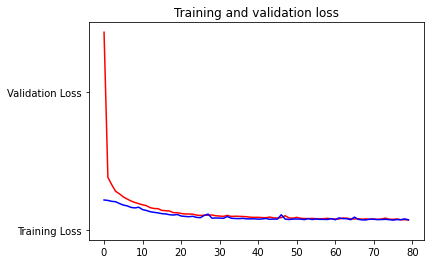

In [111]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [112]:
y_prediction=model.predict(X_val)
cutoff=0.5
y_pred=np.where(y_prediction>cutoff,1,0)

In [115]:
from sklearn.metrics import confusion_matrix
cm_deep = confusion_matrix(y_val, y_pred)
cm_deep

array([[163,   1],
       [  3,   5]], dtype=int64)

<AxesSubplot:>

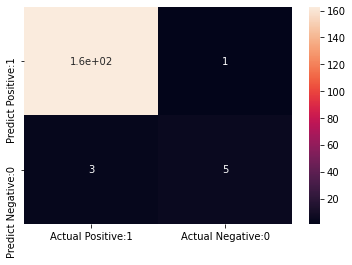

In [116]:
cm_matrix = pd.DataFrame(data=cm_deep, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True)

# Deep learning with class weighting

In [135]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [136]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [137]:
class_weight = {0: .07, 1: 1.}

In [138]:
history=model.fit(X_train,y_train,epochs=80,class_weight=class_weight,validation_data=(X_val,y_val))

Epoch 1/80
22/22 [==============================] - 1s 9ms/step - loss: 0.1118 - accuracy: 0.3309 - val_loss: 1.0324 - val_accuracy: 0.0523
Epoch 2/80
22/22 [==============================] - 0s 4ms/step - loss: 0.0916 - accuracy: 0.5481 - val_loss: 0.6789 - val_accuracy: 0.6802
Epoch 3/80
22/22 [==============================] - 0s 4ms/step - loss: 0.0853 - accuracy: 0.6327 - val_loss: 0.6340 - val_accuracy: 0.7442
Epoch 4/80
22/22 [==============================] - 0s 4ms/step - loss: 0.0845 - accuracy: 0.7318 - val_loss: 0.7755 - val_accuracy: 0.5988
Epoch 5/80
22/22 [==============================] - 0s 4ms/step - loss: 0.0802 - accuracy: 0.7828 - val_loss: 0.7015 - val_accuracy: 0.6802
Epoch 6/80
22/22 [==============================] - 0s 4ms/step - loss: 0.0768 - accuracy: 0.8163 - val_loss: 0.6056 - val_accuracy: 0.8081
Epoch 7/80
22/22 [==============================] - 0s 4ms/step - loss: 0.0749 - accuracy: 0.7959 - val_loss: 0.6779 - val_accuracy: 0.7384
Epoch 8/80
22/22 [==

Text(0.5, 1.0, 'Training and validation loss')

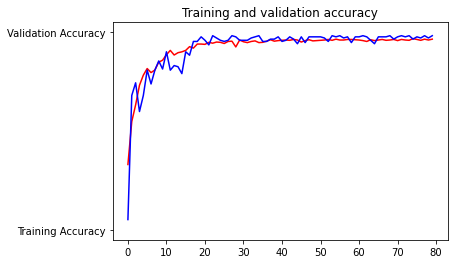

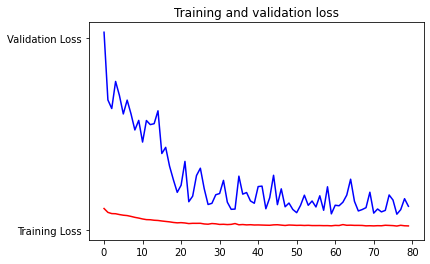

In [139]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [140]:
y_prediction=model.predict(X_val)
cutoff=0.5
y_pred=np.where(y_prediction>cutoff,1,0)

In [141]:
from sklearn.metrics import confusion_matrix
cm_deep = confusion_matrix(y_val, y_pred)
cm_deep

array([[162,   2],
       [  1,   7]], dtype=int64)

<AxesSubplot:>

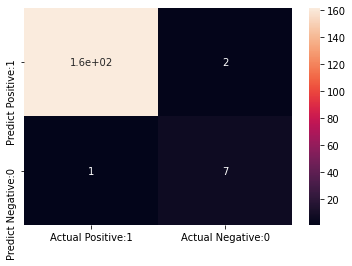

In [142]:
cm_matrix = pd.DataFrame(data=cm_deep, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True)

# Deep learning with class weighting for compensate imbalanced class got a best score. 